In [4]:
import pandas as pd

# Load the dataset
file_path ='customer_value_analysis.csv' 


In [5]:
customer_df = pd.read_csv(file_path)

In [6]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
print(customer_df.shape)

(9134, 24)


In [10]:
display(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [11]:
#Renaming columns, formatting
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')


In [12]:
#changing the type of effetive_to_date column to DateTime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [13]:
#Checking for misssing values, NaN
nan_values = customer_df.isnull().sum()
print(nan_values)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [14]:
#defining function to separte numerical and categorical columns
def separate_numerical_categorical(df):
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    categorical_df = df.select_dtypes(include=['object'])
    return numerical_df, categorical_df

In [15]:
#dropping any ID column and replacing the ID column for the real ID column, customer
customer_df = customer_df.drop(columns=['customer'])

In [22]:
#time for correlation matrix only for numerical variables
numerical_df, _ = separate_numerical_categorical(customer_df)
correlation_matrix = numerical_df.corr()

In [30]:
# Checking for the numerical variables with the highest correlation
highest_corr_pair = correlation_matrix.abs().stack().idxmax()
var1, var2 = highest_corr_pair

# Extracting variable names
var_name1, var_name2 = var1[0], var1[1]

print(f"Variables with the highest correlation: {var_name1} and {var_name2}")
print(f"Highest correlation value: {correlation_matrix.abs().loc[highest_corr_pair]}")


Variables with the highest correlation: c and u
Highest correlation value: 1.0


In [33]:
# Print correlation matrix for numerical variables
print(correlation_matrix)

# Find the maximum correlation value (excluding self-correlation)
max_corr = correlation_matrix[~correlation_matrix.isna()].max().max()
display(f"\nMaximum correlation value (excluding self-correlation): {max_corr}")


                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

'\nMaximum correlation value (excluding self-correlation): 1.0'

In [ ]:
# Looking at the correlation matrix, it seems that the pair of variables with the highest correlation is 'monthly_premium_auto' and 'total_claim_amount', with a correlation coefficient of approximately 0.632.
# Meaning there are an strong linear relationship between these 2 variables (threre is correlation)
#as the monthly premium for auto insurance increases, there is a tendency for the total claimed amount to increase as well. This relationship could be expected, as customers who opt for higher monthly premiums might do so to have more extensive coverage, and thus, they might also file claims for a larger amount.


In [34]:
#Defining function for separating continuous and discrete numerical columns
def separate_continuous_discrete(df, threshold=36):
    continuous_df = df.loc[:, df.nunique() > threshold]
    discrete_df = df.loc[:, df.nunique() <= threshold]
    return continuous_df, discrete_df

In [35]:
#creating new dataframes
continuous_df, discrete_df = separate_continuous_discrete(numerical_df)

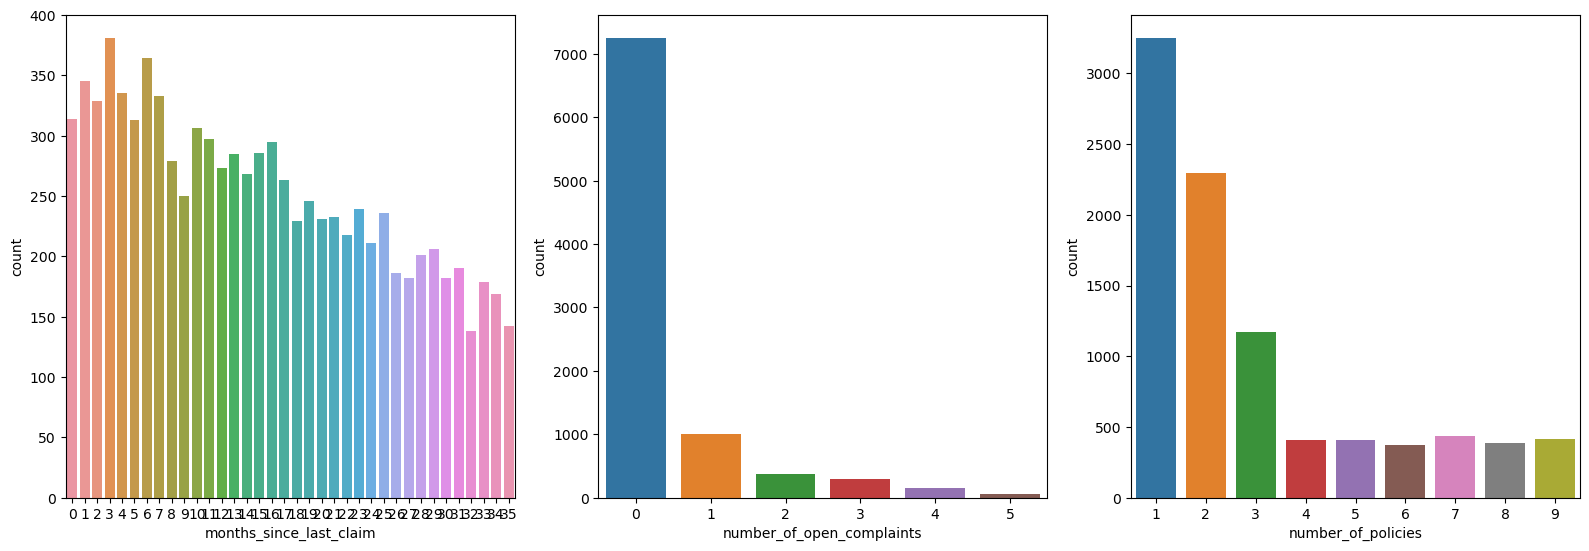

In [36]:
#creating function for barplot for all the columns of the discrete dataframe using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_columns(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.countplot(x=column, data=df)
    plt.tight_layout()
    plt.show()

# to plot barplots for discrete columns
plot_discrete_columns(discrete_df)


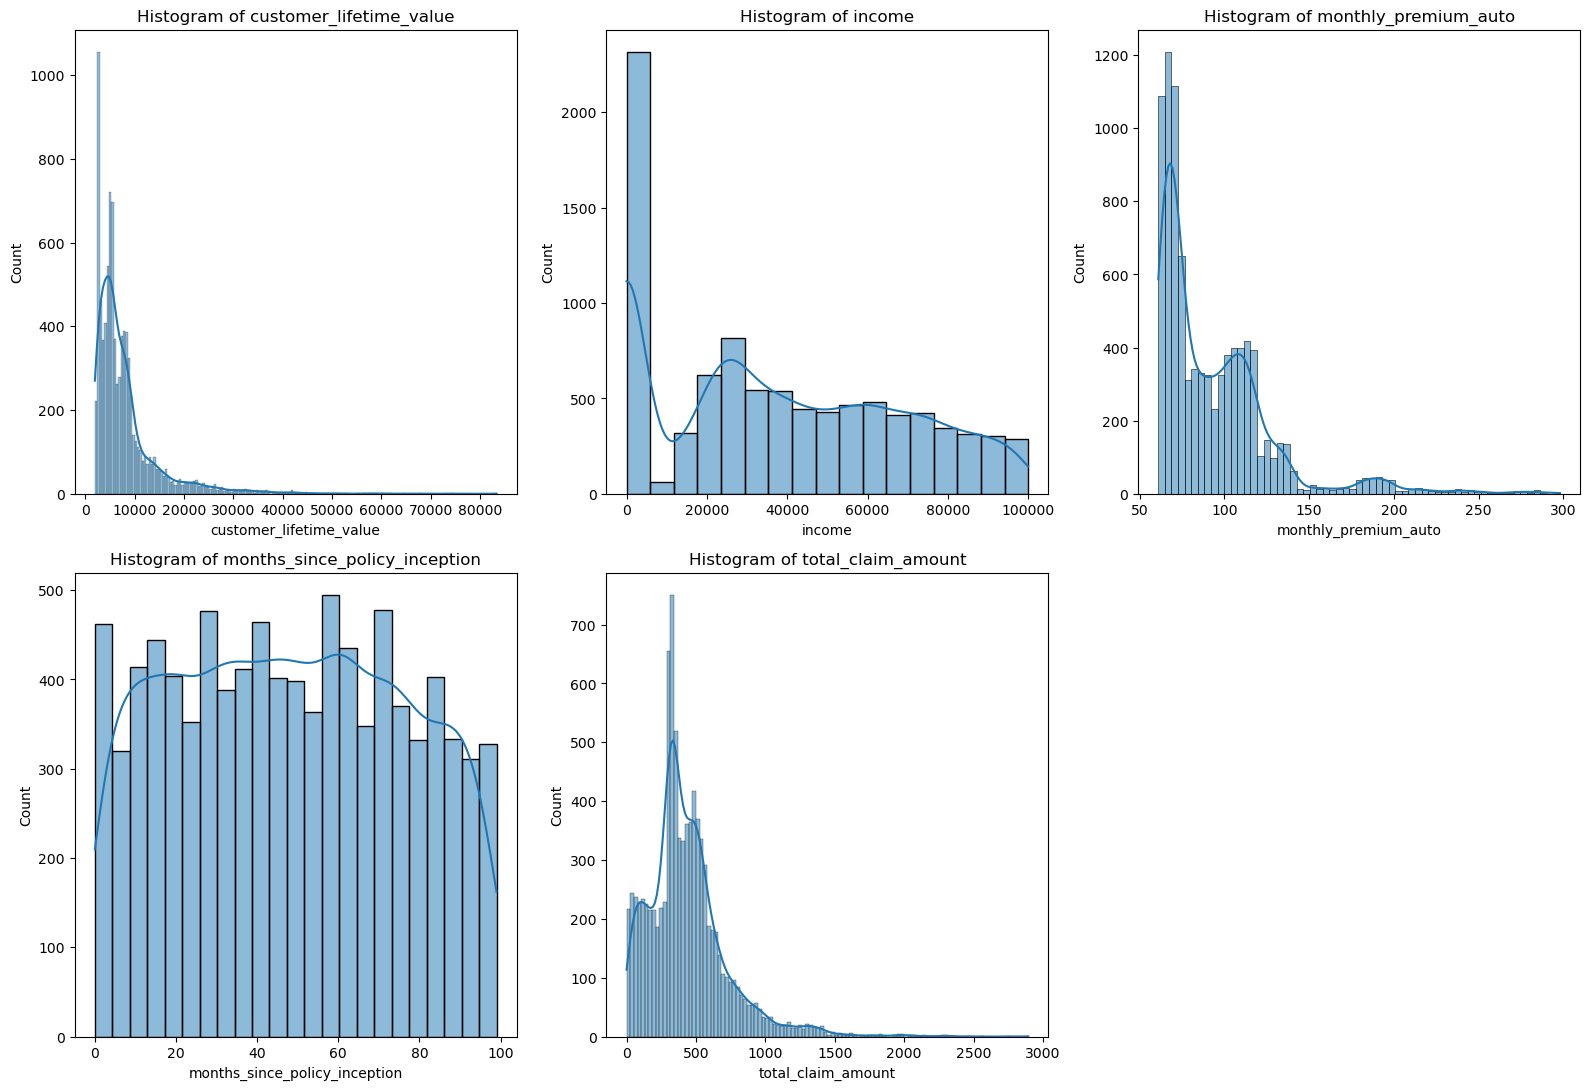

In [37]:
#histogram for the columns continuous dataframe using Seaborn
def plot_continuous_columns(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

# to plot histograms for continuous columns
plot_continuous_columns(continuous_df)



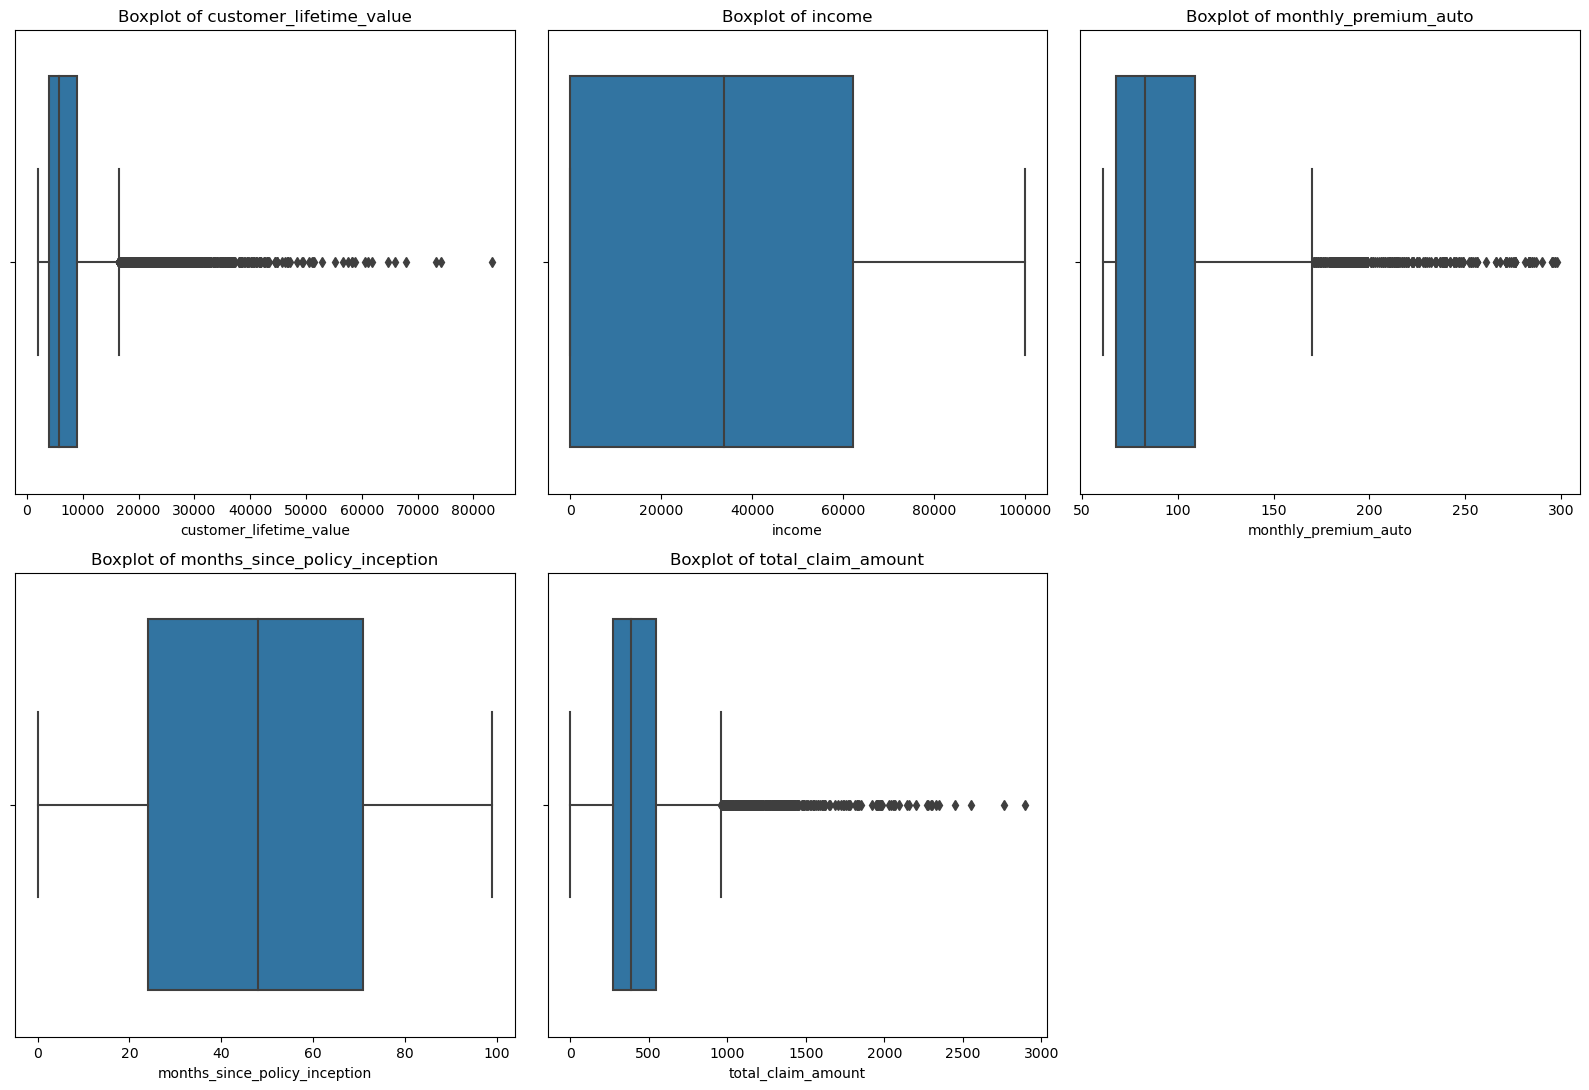

In [38]:
# we appreciate in the histogram graphs that there isn't a continuous distributions of the variables (it isn't normally distributed). Therefore we need to apply a tranformation to make the data more suitable for the analysis.
# We create a boxplot to identify outliers in the continuous variable. 

def plot_outliers(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

#boxplots for continuous columns
plot_outliers(continuous_df)


In [ ]:
# We visualize the distributions of discrete and continuous variables, identifying potential transformations needed, and detect outliers in the continuous variables.